In [23]:
import magnetic_boundaries as mb
import numpy as np
from scipy.ndimage import gaussian_filter
from math import pi
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix, csc_matrix, coo_matrix, linalg as sla

# Vector potential

3.8250652645288596e-16


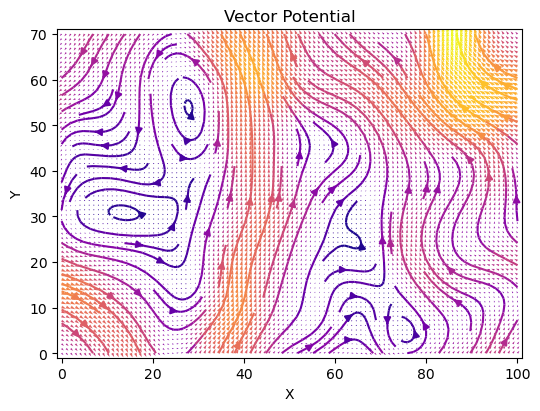

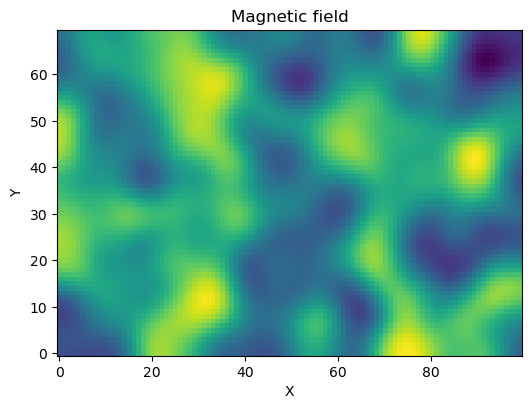

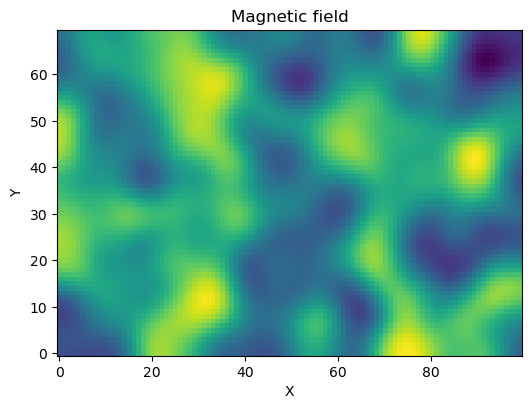

In [4]:
nx = 100
ny = 70
uniform = 2*pi/(nx*ny) #One flux quantum in the system
noise = 100*uniform


fluxes = uniform*np.ones((ny,nx))+noise*(np.random.rand(ny,nx)-np.ones((ny,nx))/2)
fluxes = gaussian_filter(fluxes, sigma=np.sqrt(nx*ny)/20)

a_e, a_n = mb.vector_potential(nx,ny,fluxes, gauge = "C4")

mb.plot_A(a_e,a_n)
recover_flux = mb.recover_field(a_e,a_n)
print(np.max(fluxes- recover_flux))
mb.plot_B(fluxes)
mb.plot_B(recover_flux)

# Rectangle

Text(0.5, 1.0, 'Lattice')

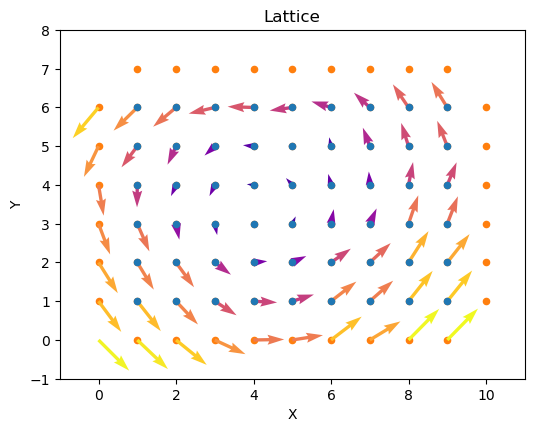

In [4]:
Lx = 10
Ly = 7
fluxes = np.random.rand(Ly,Lx)/1000
a_e, a_n = mb.vector_potential(Lx,Ly,fluxes, gauge = "C4")

parameters = dict(
    Lx = Lx,
    Ly = Ly,
    theta = 0,
    a_e = a_e,
    a_n = a_n,
    mass = 0
)

Phi, H, P, deleted_indices, spinup_shape, spindown_shape = mb.operators_rectangle(parameters, return_shape = True)

fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111)
# Define a grid of points
x = np.linspace(0, Lx-1, Lx) 
y = np.linspace(0, Ly-1, Ly)  
X, Y = np.meshgrid(x, y)    # Create a meshgrid for plotting
ax.quiver(X, Y, a_e[:-1,:], a_n[:,:-1],np.sqrt(a_e[:-1,:]**2 + a_n[:,:-1]**2),cmap="plasma") #The right and top edges are left out of the plot
ax.scatter(spinup_shape[0],spinup_shape[1], s = 20)
ax.scatter(spindown_shape[0],spindown_shape[1], s = 20,zorder=-1)
#ax.imshow(fluxes,extent=[0, Lx, 0, Ly],zorder = -2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(-1,Lx+1)
ax.set_ylim(-1,Ly+1)
ax.set_aspect('equal')
ax.set_title('Lattice')

[20, 21, 25, 40, 50, 57, 67, 80]
0
1
2
3
4
5
6
7


Text(0.5, 1.0, 'First five eigenvalues with $m = 1$')

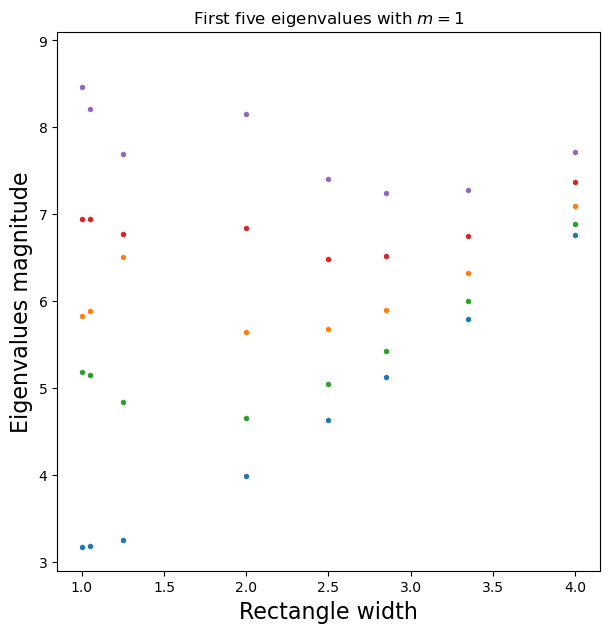

In [3]:
scale_factor = 20

area = scale_factor*scale_factor 
nbands = 10
parameters = dict()
parameters['theta'] = -pi/2
parameters['mass'] = 1/scale_factor

flux_quanta = 0
magnetic_field = 2*pi/area*flux_quanta


sides = [x for x in range(scale_factor,5*scale_factor,1) if abs(x*round(scale_factor**2/x)/(scale_factor**2)-1)<0.005]
print(sides)

spectrum = np.zeros((len(sides),nbands))
for i,side in enumerate(sides):
    print(i)
    Lx = side
    Ly = round(area/Lx)
    parameters['Lx'] = Lx
    parameters['Ly'] = Ly
    fluxes = magnetic_field*np.ones((Ly,Lx))
    a_e, a_n = mb.vector_potential(Lx,Ly,fluxes, gauge = "C4")
    parameters['a_e'] = a_e
    parameters['a_n'] = a_n
    
    ener, states, degenerate_indices = mb.solve_eigenproblem_rectangle(parameters, number_of_bands = nbands, plot_shape=False)
    spectrum[i] = np.sort(ener)

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)
colors = ['C0','C0','C0','C0','C0','C0','C2','C1','C3','C4']
for i in range(nbands):
    ax.scatter(np.array(sides)/scale_factor,scale_factor*spectrum[:,i],c = colors[i], s = 10, marker = 'h')
ax.set_ylim(2.9,9.1)
ax.set_xlabel('Rectangle width', fontsize = 16)
ax.set_ylabel('Eigenvalues magnitude', fontsize = 16)
ax.set_title(r'First five eigenvalues with $m = 1$', fontsize = 12)

# Ribbon

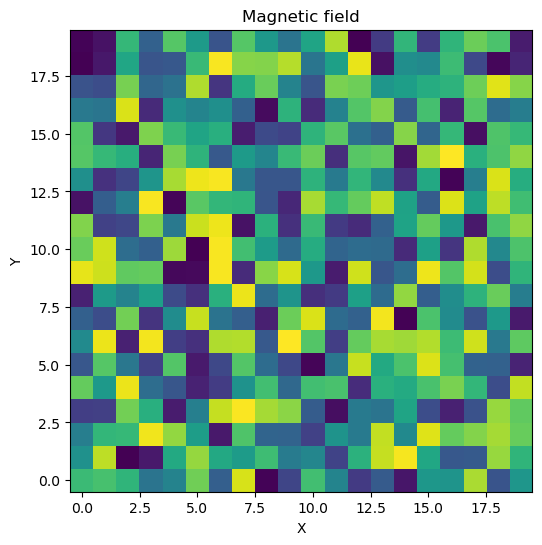

In [158]:
Lx = 20
Ly = 20
quanta = 5
noise = 30

fluxes = quanta*2*pi/(Lx*Ly)*np.ones((Ly,Lx)) + noise*quanta*(np.random.rand(Ly,Lx)-0.5)/(Lx*Ly)
fluxes = fluxes - (np.sum(fluxes)-2*pi*quanta)/(Lx*Ly)
mb.plot_B(fluxes)
a_e, a_n = mb.vector_potential(Lx,Ly,fluxes, gauge = "Landau")

parameters = dict(
    Lx = Lx,
    Ly = Ly,
    # theta_top = pi-0.01,
    # theta_bot = pi-0.01,
    theta_top = pi,
    theta_bot = pi,
    a_e = a_e,
    a_n = a_n,
    mass = 0,
    kx = 0
)


nbands = 50
kmin = -pi/Lx
kmax = pi/Lx
momenta, bands = mb.make_bands_x(parameters,number_of_bands = nbands, number_of_points = int(501), kmin = kmin, kmax = kmax)

(-3.0, 3.0)

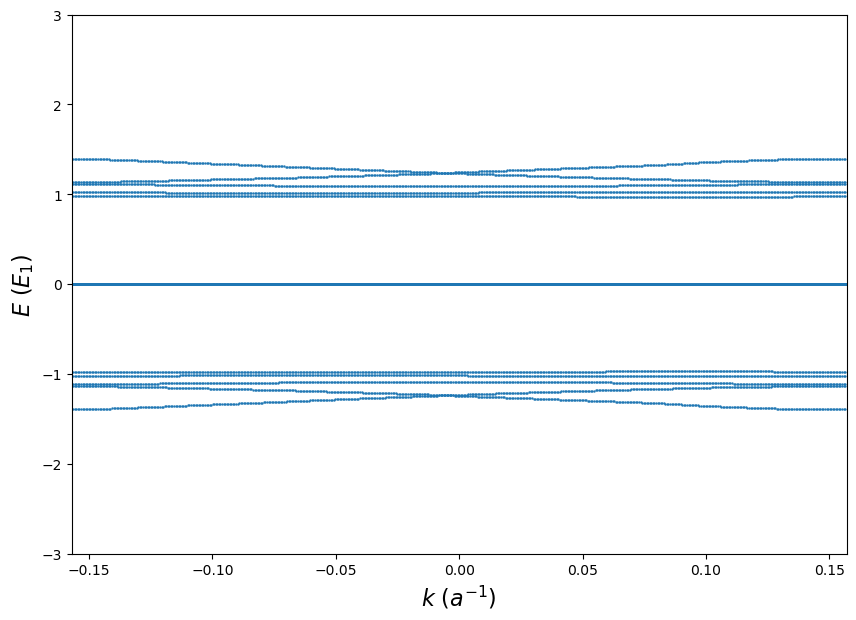

In [159]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(111)
for i in range(nbands):
    ax.scatter(momenta, bands[:,i]/(np.sqrt((4*pi*quanta/Lx/Ly)) if abs(quanta) >=1  else 1), c = 'C0', s = 0.5)
ax.set_xlabel(r"$k$ $(a^{-1})$",fontsize = 16)
ax.set_xlim(kmin,kmax)
if abs(quanta) < 1:
    ax.set_ylabel(r"$E$ $(\hbar v/a)$",fontsize = 16)
else:
    ax.set_ylabel(r"$E$ $(E_1)$",fontsize = 16)

ax.set_ylim(-3,3)

(-3.0, 3.0)

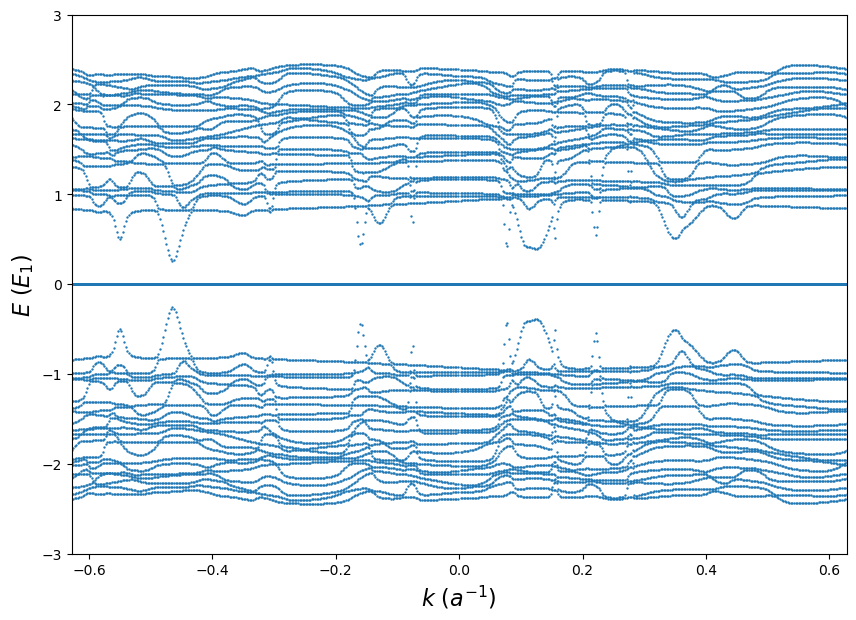

In [147]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(111)
for i in range(nbands):
    ax.scatter(momenta, bands[:,i]/(np.sqrt((4*pi*quanta/Lx/Ly)) if abs(quanta) >=1  else 1), c = 'C0', s = 0.5)
ax.set_xlabel(r"$k$ $(a^{-1})$",fontsize = 16)
ax.set_xlim(kmin,kmax)
if abs(quanta) < 1:
    ax.set_ylabel(r"$E$ $(\hbar v/a)$",fontsize = 16)
else:
    ax.set_ylabel(r"$E$ $(E_1)$",fontsize = 16)

ax.set_ylim(-3,3)

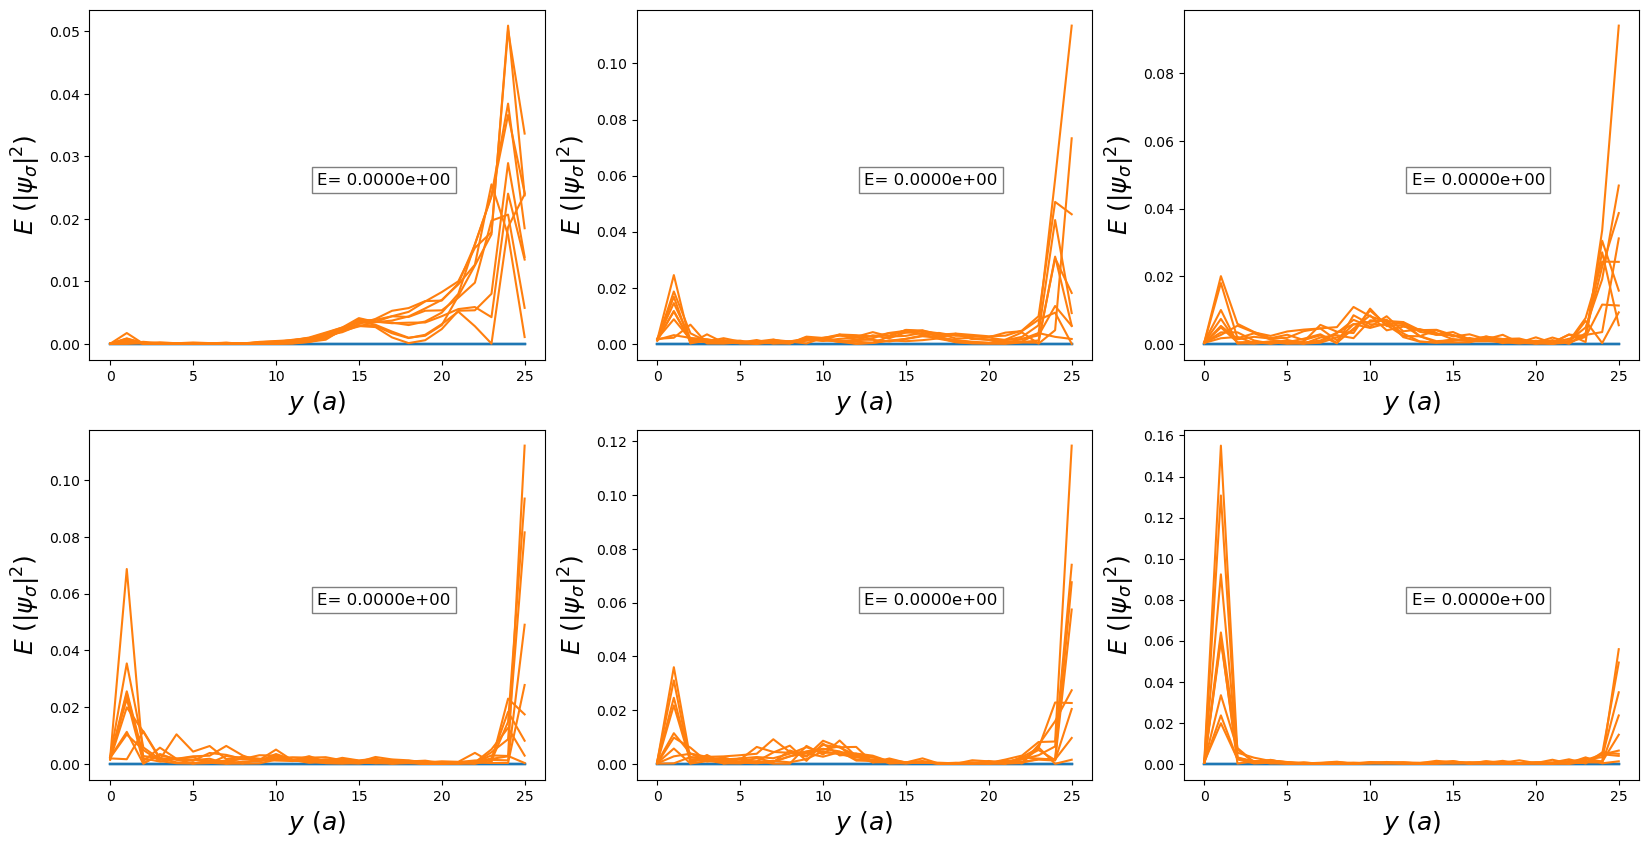

In [150]:
parameters['kx'] = 0
nbands = 22
energies, states, idx = make_states(parameters,number_of_bands = nbands)

#PLOT
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
axs = axs.flatten()
number_of_bands = 6
for i in range(number_of_bands):
    probability_density  = np.sum(np.abs((states[i]))**2,axis = 0)
    spin_up_density  = np.abs((states[i,0]))**2
    spin_down_density  = np.abs((states[i,1]))**2    
    
    axs[i].plot(spin_up_density, c = "C0")
    axs[i].plot(spin_down_density, c = "C1")
    axs[i].set_ylabel(r"$E$ $(|\psi_\sigma|^2)$",fontsize = 18)
    axs[i].set_xlabel(r"$y$ $(a)$",fontsize = 18)
   
    formatted_number = f"{energies[i]:.4e}"
    axs[i].text(0.5, 0.5, "E= "+str(formatted_number), transform=axs[i].transAxes,
            fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

Look at:
 - Bands for different field strengths, masses, Lxs. **Boundary conditions**
 - Bands when we include noise for different noise quanta through the system and Lxs
 - Eigenstates for for different field strengths, masses, Lxs. **Boundary conditions**. Here I should pay attention to how many edge modes and zero modes I expect.
 - Then repeat for a finite system


From what I see, the most interesting parameters to play with are
 - quanta
 - boundaries
 - noise


### There seems to be a stability problem. It would be nice to understand it better.

In [21]:
def make_states(parameters, number_of_bands = int(20)):
    '''Calculate eigenstates.'''
    theta_bot = parameters['theta_bot'] #float in (-pi,pi] Boundary condition angle on the bottom
    theta_top = parameters['theta_top'] #float in (-pi,pi] Boundary condition angle on the top
    Nx = Lx
    Ny = Ly+1
    #Solve generalised eigenproblem 
    Phi, H, P, deleted_indices = mb.operators_ribbon(parameters)
    eigenvalues, eigenvectors = sla.eigsh(H, M=P, k = number_of_bands, tol = 1e-7, sigma = 0.0000001, which = 'LM',return_eigenvectors = True)

    #Refill with zeros the deleted spins
    states = np.zeros((2*Nx*Ny,number_of_bands),dtype = complex)
    count = 0
    for index in range(2*Nx*Ny):
        if index not in deleted_indices:
            states[index] = (Phi@eigenvectors)[index-count]
        else:
            count += 1

    #Now make sure they are orthogonal
    overlaps = states.conjugate().transpose()@states
    ##The overlap can only be non-zero for degenerate states
    degenerate_indices = []
    bulk_indices = []    
    for i in range(overlaps.shape[0]):
        sorted = np.flip(np.sort(np.abs(overlaps[i])))
        if sorted[1]/sorted[0]<0.1: #This threshold (0.1) is a bit arbitrary
            bulk_indices.append(i)
        else:
            degenerate_indices.append(i)

    overlaps_deg = np.delete(overlaps, bulk_indices, axis=0)
    overlaps_deg = np.delete(overlaps_deg, bulk_indices, axis=1)
    overlaps_bulk = np.delete(overlaps, degenerate_indices, axis=0)
    overlaps_bulk = np.delete(overlaps_bulk, degenerate_indices, axis=1)

    states_deg = np.delete(states, bulk_indices, axis=1)
    states_bulk = np.delete(states, degenerate_indices, axis=1)

    evalues, orthogonal_coeff = np.linalg.eigh(overlaps_deg)
    orthogonal = np.append(states_deg@orthogonal_coeff, states_bulk , axis=1) #### These are finally the orthogonalised states
    norm = np.sqrt(np.diag(np.abs(orthogonal.conjugate().transpose()@orthogonal)))
    states = orthogonal/norm[None,:]
    
    # Rebuild state
    def spin_rotation(site, theta, phi):
        '''Returns a unitary transformation matrix that rotates the spin site to a theta,phi orientation'''
        rotation = np.identity(2*Nx*Ny, dtype = complex)
        
        spinup = int(site[0] + site[1]*Nx)
        spindown = int(site[0] + site[1]*Nx + Nx*Ny)
        
        rotation[spinup,spinup] = np.cos(theta/2)
        rotation[spinup,spindown] = np.sin(theta/2)
        rotation[spindown,spinup] = -np.sin(theta/2)*np.exp(1j*phi)
        rotation[spindown,spindown] = np.cos(theta/2)*np.exp(1j*phi)
        
        return csc_matrix(rotation)
        
    # We need to generate again the shape in order to refill the deleted sites
    edge_points, normal_angles = mb.generate_ribbon(Lx, Ly)
    # The parameter that we need for the spin rotation is the projection of the boundary spin on the plane, so the normal plus pi/2.
    boundary_spin_projections = normal_angles + np.ones(len(normal_angles))*pi/2

     # Rotate back the spins on the edge
    theta = np.concatenate((theta_top*np.ones(Lx), theta_bot*np.ones(Lx)))
    for point in zip(edge_points[0], edge_points[1], theta, boundary_spin_projections):
        #rotate
        rotation = spin_rotation([point[0],point[1]], point[2], point[3]) 
        states = rotation@states

    ### Reshape
    states_shaped = np.reshape(states.flatten('F'), newshape = (number_of_bands,2,Ny,Nx), order = 'C')

    ### Assign again energies
    energies = np.zeros(number_of_bands)
    for i in range(number_of_bands):
        if i in degenerate_indices:
            energies[i] = 0
        else:
            energies[i] = eigenvalues[i]

    return energies, states_shaped, degenerate_indices